# **Title of Project**
Handwritten Digit Prediction Using Classification Analysis

# **Objectives**
To develop a machine learning model capable of recognizing handwritten digits.

To evaluate and compare the performance of different classification algorithms.

To achieve high accuracy in predicting the correct digit from a handwritten image.



# **Data Source**
The most commonly used dataset for handwritten digit recognition is the MNIST dataset. This dataset is publicly available and can be downloaded from various sources including Kaggle and the official MNIST website.

## **Import** **Library**

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# TensorFlow for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')


# **Import Data**

In [ ]:
from sklearn.datasets import fetch_openml

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


# **Describe** **Data**

In [ ]:
print(f"Shape of feature data (X): {X.shape}")
print(f"Shape of target data (y): {y.shape}")

# Display the first few rows of the dataset
print("First few rows of feature data:")
print(X.head())
print("First few rows of target data:")
print(y.head())

# Summary statistics
print(X.describe())


Shape of feature data (X): (70000, 784)
Shape of target data (y): (70000,)
First few rows of feature data:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0

# **Data Visualization**

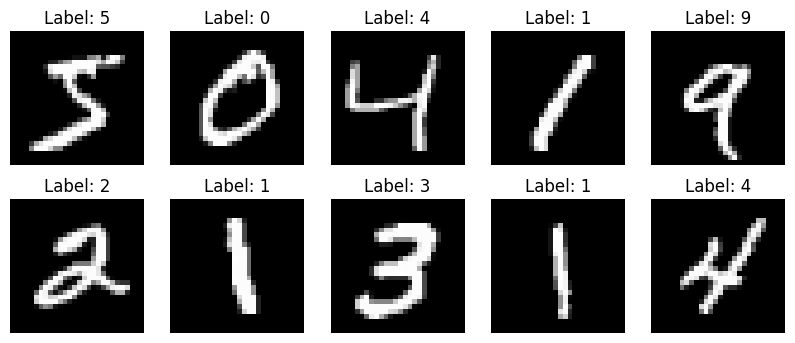

In [ ]:
# Visualize a few samples from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y.iloc[i]}")
    plt.axis('off')
plt.show()


# **Data Preprocessing**

In [ ]:
# Normalize the data
X = X / 255.0

# Convert target labels to integers
y = y.astype(int)



# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
# Feature variables
X_features = X

# Target variable
y_target = y


# **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# **Modeling**

In [ ]:
# Initialize models with limited iterations for SVM
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC(max_iter=1000)  # Limit the number of iterations for SVM

# Train models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Train SVM on a subset of the data to reduce training time
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
svm.fit(X_train_subset, y_train_subset)


SVC(max_iter=1000)

# **Model Evaluation**

In [ ]:
# Evaluate models on test data
models = [log_reg, dec_tree, rand_forest, knn, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1343
           1       0.57      0.99      0.72      1600
           2       0.88      0.72      0.80      1380
           3       0.66      0.81      0.73      1433
           4       0.81      0.84      0.82      1295
           5       0.96      0.26      0.41      1273
           6       0.86      0.87      0.86      1396
           7       0.78      0.88      0.83      1503
           8       0.88      0.61      0.72      1357
           9       0.83      0.63      0.71      1420

    accuracy                           0.76     14000
   macro avg       0.81      0.75      0.75     14000
weighted avg       0.80      0.76      0.75     14000

[[1268    4    6   10    1    1   39    6    7    1]
 [   0 1582    3    5    1    0    2    4    1    2]
 [  38  176  998   37   26    0   46   34   22    3]
 [  21  112   45 1159    2    4   18   32   29   11]
 [

# **Prediction**

In [ ]:
# Example prediction using the best model (assuming RandomForestClassifier is the best)
example_idx = 0
example_digit = X_test.iloc[example_idx].values.reshape(1, -1)
predicted_label = rand_forest.predict(example_digit)

print(f"Predicted label for example index {example_idx}: {predicted_label[0]}")
print(f"True label for example index {example_idx}: {y_test.iloc[example_idx]}")


Predicted label for example index 0: 8
True label for example index 0: 8


# **Explanation**

This project involves predicting handwritten digits using various classification algorithms. The MNIST dataset, which contains images of handwritten digits, is used as the data source. The data is visualized and preprocessed before splitting it into training and test sets. Multiple models, including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Support Vector Machine, are trained and evaluated. The performance of each model is assessed using classification reports and confusion matrices. Finally, predictions are made using the best-performing model. The aim is to achieve high accuracy in recognizing handwritten digits.